# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_csv('previsao_de_renda.csv')

In [4]:
df = df_raw.drop('Unnamed: 0', axis=1)

In [5]:
df = df.dropna()

### Tratando os dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12466 non-null  object 
 1   index                  12466 non-null  int64  
 2   sexo                   12466 non-null  object 
 3   posse_de_veiculo       12466 non-null  bool   
 4   posse_de_imovel        12466 non-null  bool   
 5   qtd_filhos             12466 non-null  int64  
 6   tipo_renda             12466 non-null  object 
 7   educacao               12466 non-null  object 
 8   estado_civil           12466 non-null  object 
 9   tipo_residencia        12466 non-null  object 
 10  idade                  12466 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  12466 non-null  float64
 13  mau                    12466 non-null  bool   
 14  renda                  12466 non-null  float64
dtypes: bool

In [7]:
# Transformando 'data_ref' em datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [8]:
tarefa_1 = df[['data_ref','qtd_filhos','tempo_emprego','idade']]
tarefa_1

,data_ref,qtd_filhos,tempo_emprego,idade
0,2015-01-01,1,3.575342,36
1,2015-01-01,0,0.860274,42
2,2015-01-01,2,8.065753,31
3,2015-01-01,0,1.208219,50
4,2015-01-01,0,13.873973,52
...,...,...,...,...
14995,2016-03-01,1,2.046575,37
14996,2016-03-01,1,12.079452,30
14997,2016-03-01,0,2.161644,40
14998,2016-03-01,0,3.295890,47


In [60]:
# Agrupando por 'data_ref'
tarefa_1_grupo = tarefa_1.groupby('data_ref')

In [11]:
# Aplicando média em 'df_grupo'
df_grupo = tarefa_1_grupo.mean()
df_grupo

,qtd_filhos,tempo_emprego,idade
data_ref,,,
2015-01-01,0.501784,7.677761,40.952438
2015-02-01,0.525424,7.688772,40.763923
2015-03-01,0.486747,7.826948,40.330120
2015-04-01,0.515225,7.750912,40.152253
2015-05-01,0.461085,8.087878,41.189858
2015-06-01,0.516564,7.745659,40.933742
2015-07-01,0.478475,8.075634,40.596556
2015-08-01,0.543210,7.279533,40.192593
2015-09-01,0.517449,7.979513,40.592058


In [50]:
# Aplicando resample em 'df_grupo' para agrupar as datas em trimestres
df_trimestres = df_grupo.resample('Q').mean()

,qtd_filhos,tempo_emprego,idade
data_ref,,,
2015-03-31,0.504651,7.731161,40.682160
2015-06-30,0.497625,7.861483,40.758618
2015-09-30,0.513045,7.778227,40.460402
2015-12-31,0.553630,7.511854,40.946448
2016-03-31,0.517724,7.867013,40.649683


In [52]:
# Aplicando desvio padrão no 'df_grupo'
df_grupo_std = tarefa_1_grupo.std()
df_grupo_std

In [42]:
df_trimestres_std = df_grupo_std.resample('Q').std()
df_trimestres_std

1) Construa um gráfico de barras para avaliar a distribuição das variáveis QUANTITATIVAS no tempo. Você acha que houve alguma alteração importante a ser investigada?

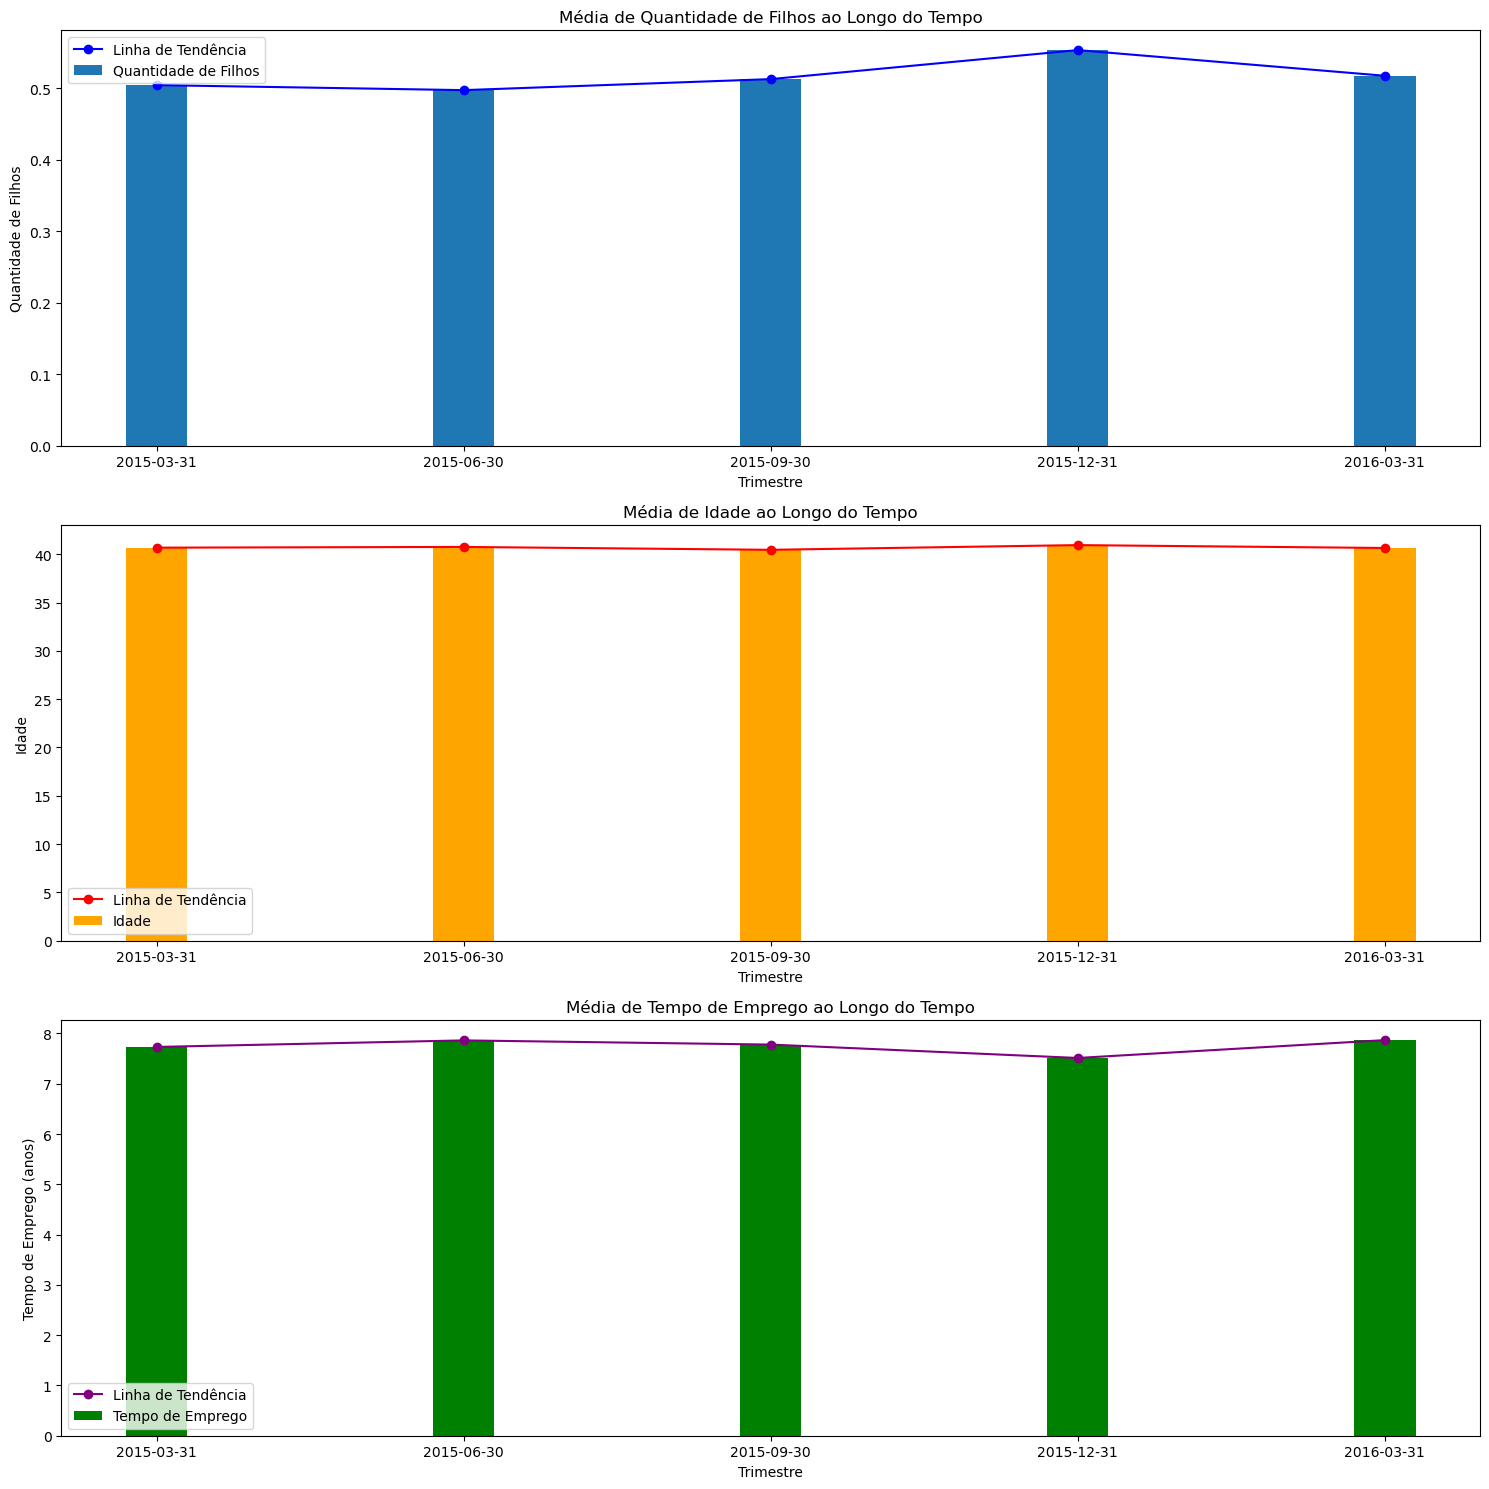

In [62]:
# Definir o número total de barras que vão ser plotadas
x = np.arange(len(df_trimestres))  # Coordenadas no eixo x
largura_barra = 0.2  # Largura de cada barra

# Criar gráficos separados com linhas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Gráfico para 'Quantidade de Filhos'
axes[0].bar(x, df_trimestres['qtd_filhos'], width=largura_barra, label='Quantidade de Filhos')
axes[0].plot(x, df_trimestres['qtd_filhos'], marker='o', color='blue', label='Linha de Tendência')
axes[0].set_title('Média de Quantidade de Filhos ao Longo do Tempo')
axes[0].set_xlabel('Trimestre')
axes[0].set_ylabel('Quantidade de Filhos')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df_trimestres.index.astype(str))
axes[0].legend()

# Gráfico para 'Idade'
axes[1].bar(x, df_trimestres['idade'], width=largura_barra, label='Idade', color='orange')
axes[1].plot(x, df_trimestres['idade'], marker='o', color='red', label='Linha de Tendência')
axes[1].set_title('Média de Idade ao Longo do Tempo')
axes[1].set_xlabel('Trimestre')
axes[1].set_ylabel('Idade')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df_trimestres.index.astype(str))
axes[1].legend()

# Gráfico para 'Tempo de Emprego'
axes[2].bar(x, df_trimestres['tempo_emprego'], width=largura_barra, label='Tempo de Emprego', color='green')
axes[2].plot(x, df_trimestres['tempo_emprego'], marker='o', color='purple', label='Linha de Tendência')
axes[2].set_title('Média de Tempo de Emprego ao Longo do Tempo')
axes[2].set_xlabel('Trimestre')
axes[2].set_ylabel('Tempo de Emprego (anos)')
axes[2].set_xticks(x)
axes[2].set_xticklabels(df_trimestres.index.astype(str))
axes[2].legend()

plt.tight_layout()
plt.show()

### R: É possível ver uma possivel correlação entre a média de [Quantidade de Filho] e a média de [Tempo de emprego] no quarto semestre (2015-12-31). Ou seja, enquanto o tempo de emprego diminui, aumenta-se a quantidade de filhos

2) Para cada variável QUANTITATIVA, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

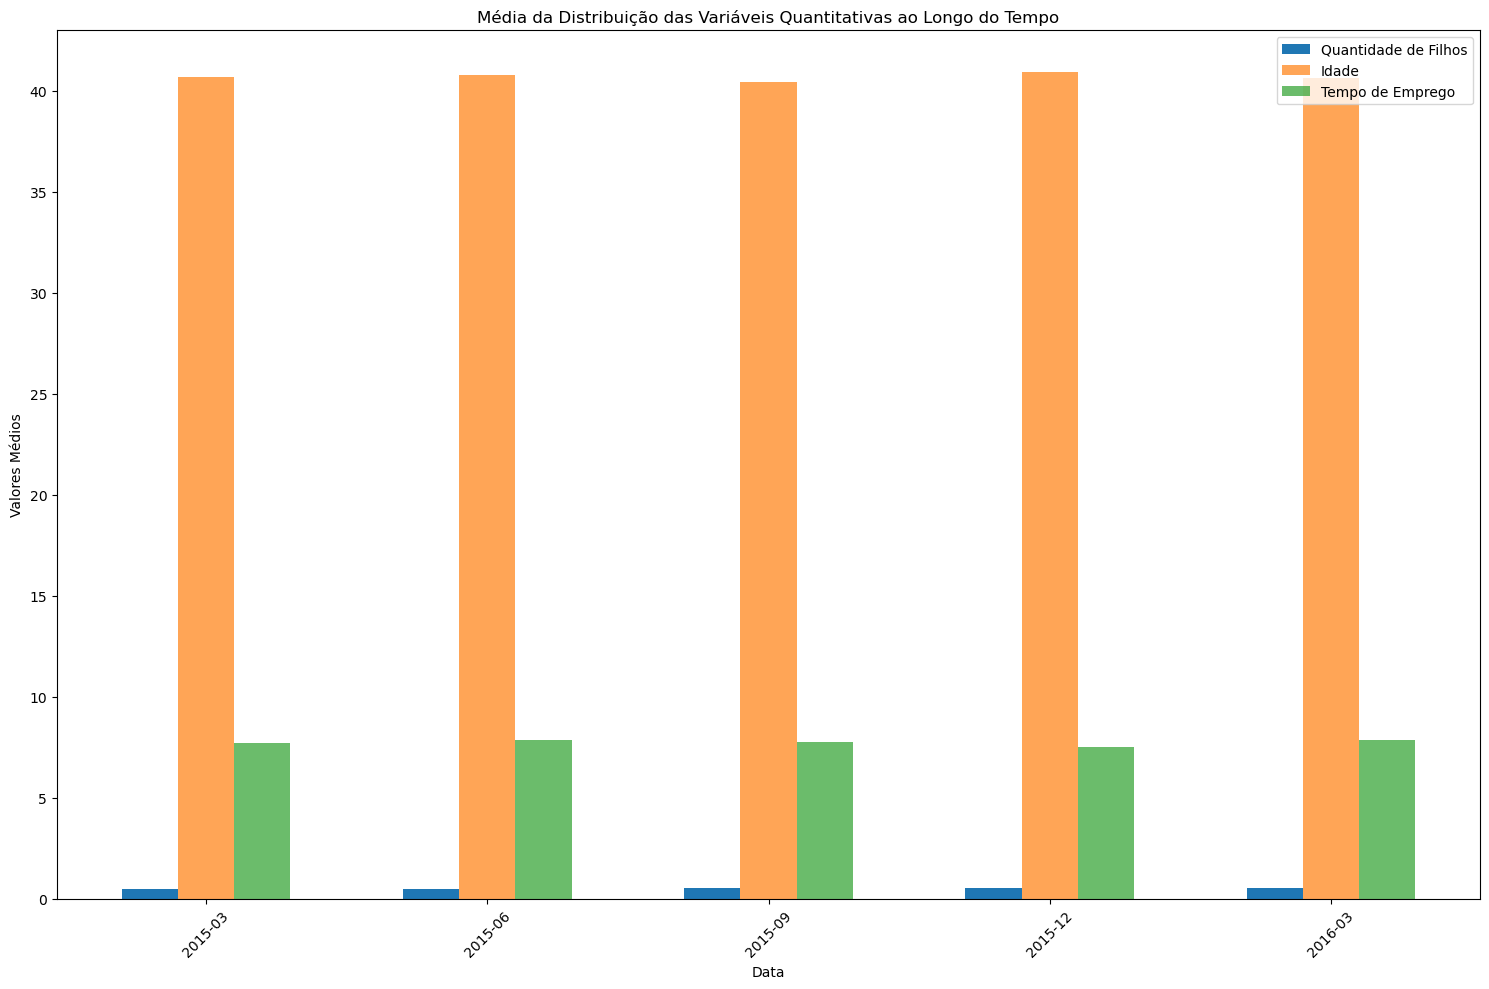

In [80]:
# Definir o número total de barras que vão ser plotadas
n_barras = 3
x = np.arange(len(df_trimestres))  # Coordenadas no eixo x
largura_barra = 0.2  # Largura de cada barra

# Criar o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(15, 10))

# Plotar cada conjunto de dados com um deslocamento no eixo x
ax.bar(x - largura_barra, df_trimestres['qtd_filhos'], width=largura_barra, label='Quantidade de Filhos')
ax.bar(x, df_trimestres['idade'], width=largura_barra, label='Idade', alpha=0.7)
ax.bar(x + largura_barra, df_trimestres['tempo_emprego'], width=largura_barra, label='Tempo de Emprego', alpha=0.7)

# Configurar o título e os rótulos
ax.set_title('Média da Distribuição das Variáveis Quantitativas ao Longo do Tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Valores Médios')
ax.legend()

# Ajustar os rótulos no eixo x
ax.set_xticks(x)
ax.set_xticklabels(df_trimestres.index.strftime('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

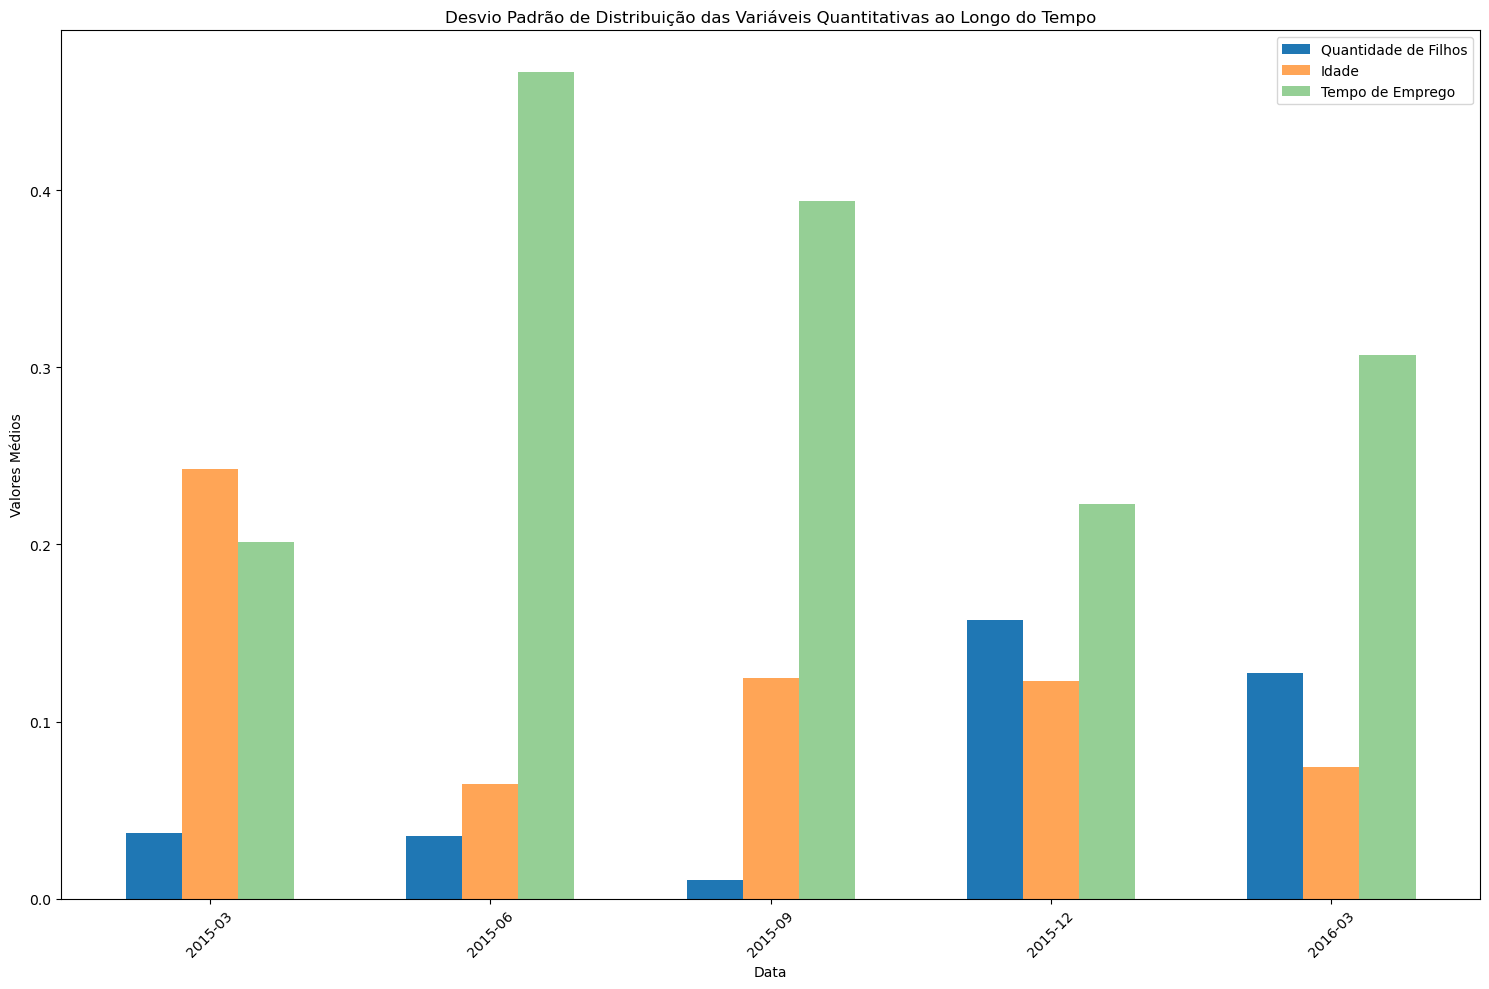

In [82]:
# Definir o número total de barras que vão ser plotadas
n_barras = 3
x = np.arange(len(df_trimestres_std))  # Coordenadas no eixo x
largura_barra = 0.2  # Largura de cada barra

# Criar o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(15, 10))

# Plotar cada conjunto de dados com um deslocamento no eixo x
ax.bar(x - largura_barra, df_trimestres_std['qtd_filhos'], width=largura_barra, label='Quantidade de Filhos')
ax.bar(x, df_trimestres_std['idade'], width=largura_barra, label='Idade', alpha=0.7)
ax.bar(x + largura_barra, df_trimestres_std['tempo_emprego'], width=largura_barra, label='Tempo de Emprego', alpha=0.5)

# Configurar o título e os rótulos
ax.set_title('Desvio Padrão de Distribuição das Variáveis Quantitativas ao Longo do Tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Valores Médios')
ax.legend()

# Ajustar os rótulos no eixo x
ax.set_xticks(x)
ax.set_xticklabels(df_trimestres.index.strftime('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### R: Aprenstei dois tipos de gráficos: Média e Desvio Padrão para se complementarem. Os gráficos mostram que tanto idade como Quantidade de Filhos são variáveis mais homogêneas e são mais constantes, sendo ruins para criar um modelo preditivo. Já a variável Tempo de emprego tem maior variação, sendo uma possível candidata a um modelo preditivo.